Saving datos_ventas_inf.csv to datos_ventas_inf (1).csv
                               SARIMAX Results                                
Dep. Variable:                  venta   No. Observations:                   56
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -727.013
Date:                Sun, 21 Sep 2025   AIC                           1460.026
Time:                        18:00:58   BIC                           1466.048
Sample:                    01-01-2019   HQIC                          1462.355
                         - 08-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5752      0.369     -1.557      0.119      -1.299       0.149
ma.L1          0.3988      0.421      0.947      0.344      -0.427       1.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-2926007730.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df.index[-1] + pd.offsets.MonthEnd(), periods=n_periodos, freq='M')


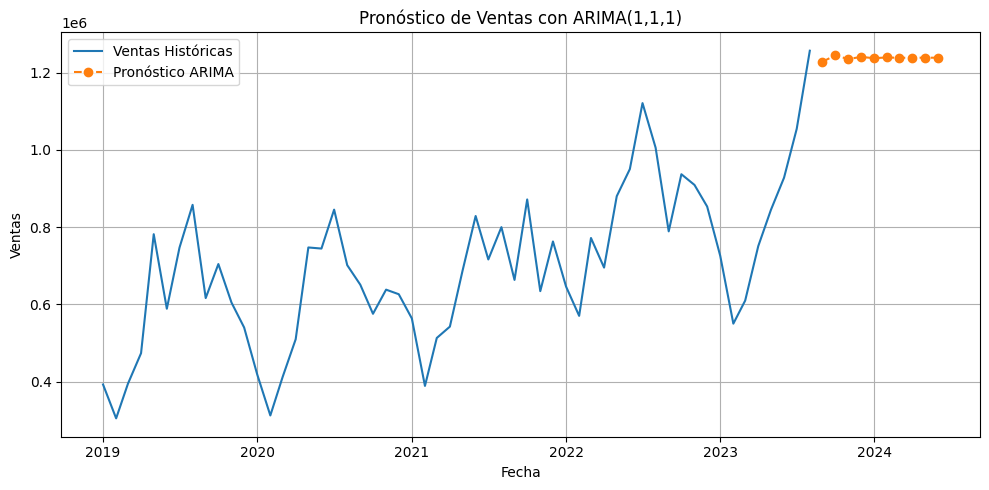

In [2]:
import pandas as pd
from google.colab import files

# Subí el archivo otra vez si es necesario
uploaded = files.upload()

# Cargar y preparar
df = pd.read_csv("datos_ventas_inf.csv")
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m")
df = df.sort_values("fecha")
df.set_index("fecha", inplace=True)
from statsmodels.tsa.arima.model import ARIMA

# Entrenar el modelo
modelo_arima = ARIMA(df["venta"], order=(1, 1, 1))
modelo_arima_fit = modelo_arima.fit()

# Resumen (opcional)
print(modelo_arima_fit.summary())
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Cantidad de períodos a pronosticar
n_periodos = 10

# Hacer predicción
forecast = modelo_arima_fit.forecast(steps=n_periodos)

# Fechas futuras
future_dates = pd.date_range(df.index[-1] + pd.offsets.MonthEnd(), periods=n_periodos, freq='M')

# Ventas reales para comparar (últimos valores reales)
ventas_reales = df["venta"].iloc[-n_periodos:]

import numpy as np

# Métricas de evaluación
mae_arima = mean_absolute_error(ventas_reales, forecast)
mape_arima = np.mean(np.abs((ventas_reales - forecast) / ventas_reales)) * 100
bias_arima = np.mean(forecast - ventas_reales)
bias_pct_arima = ((forecast - ventas_reales).sum() / ventas_reales.sum()) * 100

print(f"🔹 MAE ARIMA: {mae_arima:,.2f} unidades")
print(f"🔹 MAPE ARIMA: {mape_arima:.2f} %")
print(f"🔹 BIAS ARIMA: {bias_arima:,.2f} unidades")
print(f"🔹 BIAS% ARIMA: {bias_pct_arima:.2f} %")

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(df.index, df["venta"], label="Ventas Históricas")
plt.plot(future_dates, forecast, label="Pronóstico ARIMA", linestyle="--", marker="o")
plt.title("Pronóstico de Ventas con ARIMA(1,1,1)")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
